In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")
df.head(1)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  
0     45           1      False

In [4]:
number_of_Water = 79
number_of_normal = 61

df2.head()
df2 = df[df['Type 1'] =='Water']
df_water_train = df2.iloc[0:number_of_Water]
df_water_test = df2.iloc[60:112]

df3 = df[df['Type 1'] =='Normal']
df_Normal_train = df3.iloc[0:number_of_normal]
df_Normal_test = df3.iloc[50:98]

test = pd.concat([df_water_test,df_Normal_test],axis=0)

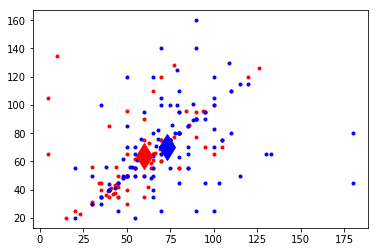

In [5]:
matrix_mean_water = [
                     df.loc[df['Type 1'] == 'Water','Defense'].mean(),
                     df.loc[df['Type 1'] == 'Water','Sp. Def'].mean(),
                    ]


matrix_mean_normal = [
                      df.loc[df['Type 1'] == 'Normal','Defense'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean(),
                      ]





plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,)

In [6]:
#df[df['Type 1'] == 'Water']['Defense'].count

number_of_total = number_of_Water + number_of_normal
P_c1 = number_of_Water/number_of_total
P_c2 = number_of_normal/number_of_total
print(P_c1)
print(P_c2)

0.5642857142857143
0.4357142857142857


# C1 class

In [7]:

Defense_matrix_water = np.array(df_water_train['Defense']-matrix_mean_water[0])
SpDef_matrix_water =   np.array(df_water_train['Sp. Def']-matrix_mean_water[1])


combined_water = np.vstack((Defense_matrix_water,SpDef_matrix_water)).T

x_matrix_total_water = np.zeros([2, 2]) 
for i in range(number_of_Water): 
    
    x_matrix_water = np.mat(combined_water[i])
    x_matrix_total_water = x_matrix_total_water + np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = x_matrix_total_water/number_of_Water

# C2 class

In [8]:

Defense_matrix_normal = np.array(df_Normal_train['Defense']-matrix_mean_normal[0])
SpDef_matrix_normal =   np.array(df_Normal_train['Sp. Def']-matrix_mean_normal[1])


combined_normal = np.vstack((Defense_matrix_normal,SpDef_matrix_normal)).T
                             
x_matrix_total_normal = np.zeros([2, 2]) 
for i in range(number_of_normal): 
    
    x_matrix_normal = np.mat(combined_normal[i])
    x_matrix_total_normal = x_matrix_total_normal + np.dot(x_matrix_normal.T,x_matrix_normal)
x_matrix_total_normal = x_matrix_total_normal/number_of_normal

In [9]:
total_matrix = (P_c2*(x_matrix_total_normal)) + (P_c1*(x_matrix_total_water))
x_matrix_total_normal_inverse =  np.linalg.inv(x_matrix_total_normal)
x_matrix_total_water_inverse = np.linalg.inv(x_matrix_total_water)
inverse_total = np.linalg.inv(total_matrix)

In [10]:
def Classification_count(x) : 
    
    x = np.mat(x)
    matrix_water = np.dot(np.dot((x-matrix_mean_water),x_matrix_total_water_inverse),(x-matrix_mean_water).T)
    e_c1 = math.exp(-0.5*matrix_water)
    absdet_c1 = math.sqrt(abs(np.linalg.det(total_matrix)))
    pi = (math.pi)
    P_x_C1 = e_c1/(absdet_c1*pi)
    
    matrix_normal = np.dot(np.dot((x-matrix_mean_normal),x_matrix_total_normal_inverse),(x-matrix_mean_normal).T)
    e_c2= (math.exp(-0.5*matrix_normal))
    absdet_c2 = math.sqrt(abs(np.linalg.det(total_matrix)))
    P_x_C2 = e_c2/(absdet_c2*pi)
              
    probability_c1_x=(P_x_C1*P_c1)/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    probability_c2_x=(P_x_C2*P_c2)/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    
    return probability_c1_x

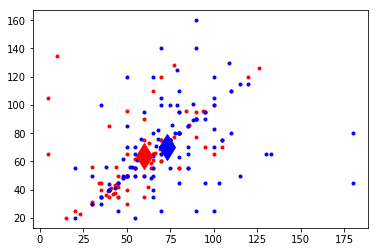

In [11]:

plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',
         matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,
        )

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


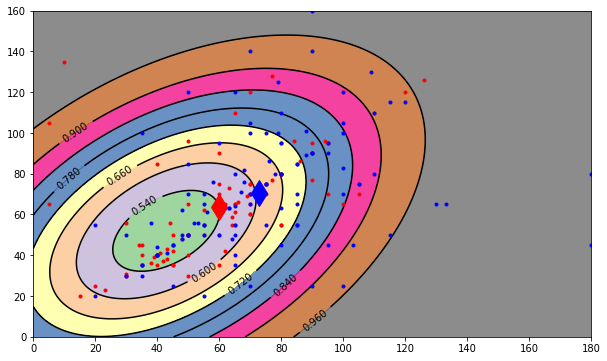

In [12]:
plt.figure(figsize=(10,6))

n = 256
X = np.linspace(0,180,n) 
Y = np.linspace(0,160,n) 
X, Y = np.meshgrid(X,Y) 
Z = np.zeros([n, n]) 
for i in range(n):
    for j in range(n):
        Z[i][j] = Classification_count((X[i][j],Y[i][j]))
        


# 填充等高线的颜色, 8是等高线分为几部分
plt.contourf(X, Y, Z,8, alpha = 0.75, cmap = plt.cm.Accent)

C = plt.contour(X,Y,Z,8, colors='black', linewidth=8)

# 绘制等高线数据
plt.clabel(C, inline = True, fontsize = 10)
plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',
         matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,
        )

In [13]:
def Classification_count_linear(x) : 
    
    x = np.mat(x)
    matrix_water = np.dot(np.dot((x-matrix_mean_water),inverse_total),(x-matrix_mean_water).T)
    e_c1 = math.exp(-0.5*matrix_water)
    absdet_c1 = math.sqrt(abs(np.linalg.det(total_matrix)))
    pi = (math.pi)
    P_x_C1 = e_c1/(absdet_c1*pi)
    
    matrix_normal = np.dot(np.dot((x-matrix_mean_normal),inverse_total),(x-matrix_mean_normal).T)
    e_c2= (math.exp(-0.5*matrix_normal))
    absdet_c2 = math.sqrt(abs(np.linalg.det(total_matrix)))
    P_x_C2 = e_c2/(absdet_c2*pi)
              
    probability_c1_x=(P_x_C1*P_c1)/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    probability_c2_x=(P_x_C2*P_c2)/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    
    return probability_c1_x

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


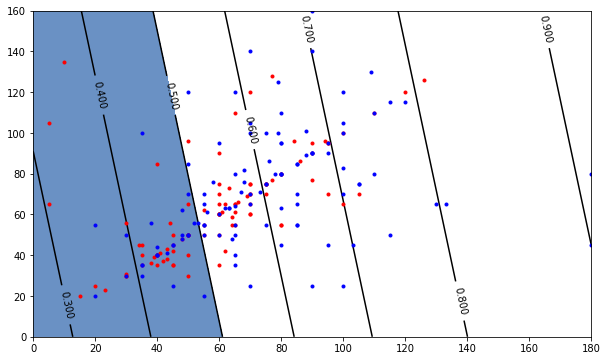

In [14]:
plt.figure(figsize=(10,6))

n = 256
X = np.linspace(0,180,n) 
Y = np.linspace(0,160,n) 
X, Y = np.meshgrid(X,Y) 
Z = np.zeros([n, n]) 
for i in range(n):
    for j in range(n):
        Z[i][j] = Classification_count_linear((X[i][j],Y[i][j]))
        



plt.contourf(X, Y, Z,[0,0.5], alpha = 0.75, cmap = plt.cm.Accent)

C = plt.contour(X,Y,Z,colors='black', linewidth=8)

# 绘制等高线数据
plt.clabel(C, inline = True, fontsize = 10)
plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )
#plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,)

In [22]:
np.dot(np.mat(matrix_mean_water)-np.mat(matrix_mean_normal),inverse_total)

matrix([[0.01754179, 0.00246004]])

In [18]:
a = matrix_mean_water - matrix_mean_normal

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [21]:
np.mat(matrix_mean_water)-np.mat(matrix_mean_normal)

matrix([[13.0994898 ,  6.79336735]])

In [20]:
matrix_mean_normal

[59.8469387755102, 63.724489795918366]